In [107]:
#import the dependencies
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
#Create dataframe to read from Anime csv
df = pd.read_csv('/content/sample_data/Anime.csv')

In [110]:
#Find info summary, head of each DataFrame
df.info()

print("Shape ", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15278 entries, 0 to 15277
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   animeID          15278 non-null  int64  
 1    name            15278 non-null  object 
 2    title_english   6122 non-null   object 
 3    title_japanese  15230 non-null  object 
 4    title_synonyms  15273 non-null  object 
 5    type            15273 non-null  object 
 6    source          15273 non-null  object 
 7    producers       15273 non-null  object 
 8    genre           15273 non-null  object 
 9    studio          15273 non-null  object 
 10   episodes        14732 non-null  float64
 11   status          15273 non-null  object 
 12   airing          15273 non-null  object 
 13   aired           15273 non-null  object 
 14   duration        15273 non-null  object 
 15   rating          15273 non-null  object 
 16   score           14778 non-null  float64
 17   scored_by  

In [111]:
# Display first 20 data rows
df.head(20)

,animeID,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,...,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],...,405664.0,26.0,39.0,795733.0,43460.0,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,"[""Cowboy Bebop: Knockin' on Heaven's Door""]",Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],...,120243.0,164.0,449.0,197791.0,776.0,"Another day, another bounty—such is the life o...",NaN,NaN,NaN,"{'Parent story': [{'mal_id': 1, 'type': 'anime..."
2,6,Trigun,Trigun,トライガン,[],TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],...,212537.0,255.0,146.0,408548.0,10432.0,"Vash the Stampede is the man with a $$60,000,0...",The Japanese release by Victor Entertainment h...,Spring 1998,Thursdays at 01:15 (JST),"{'Adaptation': [{'mal_id': 703, 'type': 'manga..."
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN,['WHR'],TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],...,32837.0,2371.0,1171.0,79397.0,537.0,Witches are individuals with special powers li...,NaN,Summer 2002,Tuesdays at Unknown,{}
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,['Adventure King Beet'],TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],...,4894.0,3544.0,3704.0,11708.0,14.0,It is the dark century and the people are suff...,NaN,Fall 2004,Thursdays at 18:30 (JST),"{'Adaptation': [{'mal_id': 1348, 'type': 'mang..."
5,16,Hachimitsu to Clover,Honey and Clover,ハチミツとクローバー,"['HachiKuro', 'Honey & Clover']",TV,Manga,"['Genco', 'Fuji TV', 'Shueisha']","['Comedy', 'Drama', 'Josei', 'Romance', 'Slice...",['J.C.Staff'],...,57065.0,419.0,536.0,172274.0,3752.0,"Yuuta, Takumi, and Shinobu share a six-tatami ...",Hachimitsu to Clover was the first anime to ai...,Spring 2005,Fridays at 00:35 (JST),"{'Adaptation': [{'mal_id': 1009, 'type': 'mang..."
6,17,Hungry Heart: Wild Striker,NaN,ハングリーハート Wild Striker,[],TV,Manga,[],"['Slice of Life', 'Comedy', 'Sports', 'Shounen']",['Nippon Animation'],...,9307.0,1186.0,3124.0,17145.0,210.0,Kyosuke Kano has lived under the shadow of his...,NaN,Fall 2002,Wednesdays at Unknown,"{'Adaptation': [{'mal_id': 4147, 'type': 'mang..."
7,18,Initial D Fourth Stage,NaN,頭文字〈イニシャル〉D FOURTH STAGE,['Initial D 4th Stage'],TV,Manga,"['OB Planning', 'Studio Jack']","['Action', 'Cars', 'Sports', 'Drama', 'Seinen']",['A.C.G.T.'],...,42555.0,298.0,1262.0,73438.0,635.0,Takumi Fujiwara and brothers Keisuke and Ryous...,NaN,Spring 2004,Unknown,"{'Adaptation': [{'mal_id': 375, 'type': 'manga..."
8,19,Monster,Monster,モンスター,[],TV,Manga,"['VAP', 'Shogakukan Productions', 'Nippon Tele...","['Drama', 'Horror', 'Mystery', 'Police', 'Psyc...",['Madhouse'],...,131233.0,49.0,156.0,394387.0,19188.0,"Dr. Kenzo Tenma, an elite neurosurgeon recentl...",NaN,Spring 2004,Wednesdays at 00:40 (JST),"{'Adaptation': [{'mal_id': 1, 'type': 'manga',..."
9,20,Naruto,Naruto,ナルト,['NARUTO'],TV,Manga,"['TV Tokyo', 'Aniplex', 'Shueisha']","['Action', 'Adventure', 'Comedy', 'Super Power...",['Studio Pierrot'],...,716412.0,705.0,10.0,1091313.0,39356.0,"Moments prior to Naruto Uzumaki's birth, a hug...",Naruto received numerous awards during its air...,Fall 2002,Thursdays at 19:30 (JST),"{'Adaptation': [{'mal_id': 11, 'type': 'manga'..."


## Data Preparation and Cleaning
## Exploring columns and rows

In [112]:

print("Number of rows: ", len(df))
print("Number of columns: ", len(df.columns))

Number of rows:  15278
Number of columns:  27


In [113]:
df.columns.values

array(['animeID', ' name', ' title_english', ' title_japanese',
       ' title_synonyms', ' type', ' source', ' producers', ' genre',
       ' studio', ' episodes', ' status', ' airing', ' aired',
       ' duration', ' rating', ' score', ' scored_by', ' rank',
       ' popularity', ' members', ' favorites', ' synopsis',
       ' background', ' premiered', ' broadcast', ' related'],
      dtype=object)

#From the above column names we find there are a lot of empty spaces before column names. Remove empty spaces before column names using strip function

In [114]:
df.columns = df.columns.str.strip()


In [115]:
df.columns.values

array(['animeID', 'name', 'title_english', 'title_japanese',
       'title_synonyms', 'type', 'source', 'producers', 'genre', 'studio',
       'episodes', 'status', 'airing', 'aired', 'duration', 'rating',
       'score', 'scored_by', 'rank', 'popularity', 'members', 'favorites',
       'synopsis', 'background', 'premiered', 'broadcast', 'related'],
      dtype=object)

## Find missing, Nan values

In [116]:
print(" \n Description of each column with missing values \n", df.isnull().sum())

#Total number of missing values NaN at each column in a DataFrame
print(" \n Total number of missing values NaN in the DataFrame : \n\n", df.isnull().sum().sum())

#Total number of columns with missing values with axis = 0 for column wise operation
print(" \n Total number of columns with missing values : \n\n", df.isnull().any(axis=0).sum())

#Total number of records with missing values axis = 1 for row wise operation
print(" \n Total number of records with missing values : \n\n", df.isnull().any(axis=1).sum() )

 
 Description of each column with missing values 
 animeID               0
name                  0
title_english      9156
title_japanese       48
title_synonyms        5
type                  5
source                5
producers             5
genre                 5
studio                5
episodes            546
status                5
airing                5
aired                 5
duration              5
rating                5
score               500
scored_by             5
rank               1609
popularity            5
members               5
favorites             5
synopsis            713
background        14160
premiered         11099
broadcast         10876
related               5
dtype: int64
 
 Total number of missing values NaN in the DataFrame : 

 48787
 
 Total number of columns with missing values : 

 25
 
 Total number of records with missing values : 

 14822


In [117]:
#Find all values to rank column
#df.loc[:,"rank"]

#remove all null row
df.dropna(inplace=True)

df.shape

#Check for null na value rows after updation
df.isnull().sum()


animeID           0
name              0
title_english     0
title_japanese    0
title_synonyms    0
type              0
source            0
producers         0
genre             0
studio            0
episodes          0
status            0
airing            0
aired             0
duration          0
rating            0
score             0
scored_by         0
rank              0
popularity        0
members           0
favorites         0
synopsis          0
background        0
premiered         0
broadcast         0
related           0
dtype: int64

## Exploratory Analysis of Data (EAD)

In [118]:
#Sort anime based on rank from highest to lowest
df.sort_values('rank',ascending=True).head(5)

,animeID,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,...,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
3769,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...,TV,Manga,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",['Bones'],...,826899.0,1.0,4.0,1355349.0,120331.0,"""In order for something to be obtained, someth...",Fullmetal Alchemist: Brotherhood is an alterna...,Spring 2009,Sundays at 17:00 (JST),"{'Adaptation': [{'mal_id': 25, 'type': 'manga'..."
5470,9253,Steins;Gate,Steins;Gate,STEINS;GATE,[],TV,Visual novel,"['Frontier Works', 'Media Factory', 'Movic', '...","['Thriller', 'Sci-Fi']",['White Fox'],...,633590.0,3.0,7.0,1139182.0,104173.0,The self-proclaimed mad scientist Rintarou Oka...,Steins;Gate is based on 5pb. and Nitroplus' .,Spring 2011,Wednesdays at 02:05 (JST),"{'Adaptation': [{'mal_id': 17517, 'type': 'man..."
9699,28977,Gintama°,Gintama Season 4,銀魂°,"[""Gintama' (2015)""]",TV,Manga,"['TV Tokyo', 'Aniplex', 'Dentsu']","['Action', 'Comedy', 'Historical', 'Parody', '...",['Bandai Namco Pictures'],...,82835.0,4.0,362.0,232437.0,6375.0,"Gintoki, Shinpachi, and Kagura return as the f...",This is a fourth season of Gintama. In the epi...,Spring 2015,Wednesdays at 18:00 (JST),"{'Adaptation': [{'mal_id': 44, 'type': 'manga'..."
5792,9969,Gintama',Gintama Season 2,銀魂',['Gintama (2011)'],TV,Manga,"['TV Tokyo', 'Aniplex', 'Dentsu', 'Trinity Sou...","['Action', 'Sci-Fi', 'Comedy', 'Historical', '...",['Sunrise'],...,101593.0,7.0,344.0,239983.0,4754.0,"After a one-year hiatus, Shinpachi Shimura ret...",This is the second season of Gintama. In the e...,Spring 2011,Mondays at 18:00 (JST),"{'Adaptation': [{'mal_id': 44, 'type': 'manga'..."
7044,15417,Gintama': Enchousen,Gintama: Enchousen,銀魂' 延長戦,"[""Gintama' (2012)"", ""Gintama' Overdrive"", 'Kin...",TV,Manga,"['TV Tokyo', 'Aniplex', 'Dentsu', 'Shueisha', ...","['Action', 'Comedy', 'Historical', 'Parody', '...",['Sunrise'],...,71441.0,8.0,679.0,140930.0,1651.0,"While Gintoki Sakata was away, the Yorozuya fo...",This is a third season of Gintama. In the epis...,Fall 2012,Thursdays at 18:00 (JST),"{'Adaptation': [{'mal_id': 44, 'type': 'manga'..."


In [119]:
#Sort anime based on popularity from highest to lowest
df.sort_values('popularity',ascending=True).head(5)

,animeID,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,...,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
1311,1535,Death Note,Death Note,デスノート,['DN'],TV,Manga,"['VAP', 'Konami', 'Ashi Production', 'Nippon T...","['Mystery', 'Police', 'Psychological', 'Supern...",['Madhouse'],...,1107955.0,54.0,1.0,1610561.0,96146.0,"A shinigami, as a god of death, can kill any p...",Death Note has been adapted into live action f...,Fall 2006,Wednesdays at 00:56 (JST),"{'Adaptation': [{'mal_id': 21, 'type': 'manga'..."
7233,16498,Shingeki no Kyojin,Attack on Titan,進撃の巨人,['AoT'],TV,Manga,"['Production I.G', 'Dentsu', 'Mainichi Broadca...","['Action', 'Military', 'Mystery', 'Super Power...",['Wit Studio'],...,1038161.0,116.0,2.0,1500958.0,70555.0,"Centuries ago, mankind was slaughtered to near...",Shingeki no Kyojin adapts content from the fir...,Spring 2013,Sundays at 01:58 (JST),"{'Adaptation': [{'mal_id': 23390, 'type': 'man..."
6396,11757,Sword Art Online,Sword Art Online,ソードアート・オンライン,"['S.A.O', 'SAO']",TV,Light novel,"['Aniplex', 'Genco', 'DAX Production', 'ASCII ...","['Action', 'Adventure', 'Fantasy', 'Game', 'Ro...",['A-1 Pictures'],...,1007035.0,1440.0,3.0,1442099.0,53268.0,"In the year 2022, virtual reality has progress...",Sword Art Online adapts the first 4 novels of ...,Summer 2012,Sundays at 00:00 (JST),"{'Adaptation': [{'mal_id': 21479, 'type': 'man..."
3769,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...,TV,Manga,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",['Bones'],...,826899.0,1.0,4.0,1355349.0,120331.0,"""In order for something to be obtained, someth...",Fullmetal Alchemist: Brotherhood is an alterna...,Spring 2009,Sundays at 17:00 (JST),"{'Adaptation': [{'mal_id': 25, 'type': 'manga'..."
10238,30276,One Punch Man,One Punch Man,ワンパンマン,"['One Punch-Man', 'One-Punch Man', 'OPM']",TV,Web manga,"['TV Tokyo', 'Bandai Visual', 'Lantis', 'Asats...","['Action', 'Sci-Fi', 'Comedy', 'Parody', 'Supe...",['Madhouse'],...,806647.0,46.0,5.0,1195384.0,35969.0,The seemingly ordinary and unimpressive Saitam...,Episodes 1 and 2 were previewed at a screening...,Fall 2015,Mondays at 01:05 (JST),"{'Adaptation': [{'mal_id': 44347, 'type': 'man..."


We conclude that Death note, Shingeki no Kyojin, Sword Art Online, Fullmetal Alchemist: Brotherhood and One punch man are the most popularly watch anime of all time.

## Analysis of Genre

In [120]:
df['genre'].unique()

array(["['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space']",
       "['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'Drama', 'Shounen']",
       "['Comedy', 'Drama', 'Josei', 'Romance', 'Slice of Life']",
       "['Action', 'Adventure', 'Comedy', 'Super Power', 'Martial Arts', 'Shounen']",
       "['Action', 'Comedy', 'Sports', 'School', 'Shounen']",
       "['Action', 'Dementia', 'Drama', 'Mecha', 'Psychological', 'Sci-Fi']",
       "['Action', 'Adventure', 'Demons', 'Drama', 'Fantasy', 'Horror', 'Military', 'Romance', 'Seinen', 'Supernatural']",
       "['Sci-Fi', 'Comedy', 'Drama', 'Romance', 'Ecchi', 'Seinen']",
       "['Action', 'Military', 'Sci-Fi', 'Comedy', 'Mecha']",
       "['Action', 'Comedy', 'School']",
       "['Action', 'Military', 'Mecha']",
       "['Action', 'Military', 'Sci-Fi', 'Space', 'Mecha']",
       "['Action', 'Sci-Fi', 'Adventure']",
       "['Slice of Life', 'Comedy', 'Drama', 'Romance', 'Fantasy', 'Shoujo']",
       "['Action', 'Adventure', 'Comedy

In [121]:
genreArray=np.array(df['genre'].unique())

import ast

#create an empty dict
genre_dict = {}

ind=0;
for genres in genreArray:
    genreList = ast.literal_eval(genres) #now we get "Action", "Adventure", etc... in string array
    print("Length ",ind,": ", len(genreList))
    for genre in genreList:
        if genre in genre_dict:      #check whether the dictionary got the item or not
            genre_dict[genre]+=1
        else:
            genre_dict[genre]=1       #if not in dictionary, we assign count of 1 to initialize new key for the dict
        print(genre)
    print("\n")
    ind+=1

Length  0 :  6
Action
Adventure
Comedy
Drama
Sci-Fi
Space


Length  1 :  6
Action
Sci-Fi
Adventure
Comedy
Drama
Shounen


Length  2 :  5
Comedy
Drama
Josei
Romance
Slice of Life


Length  3 :  6
Action
Adventure
Comedy
Super Power
Martial Arts
Shounen


Length  4 :  5
Action
Comedy
Sports
School
Shounen


Length  5 :  6
Action
Dementia
Drama
Mecha
Psychological
Sci-Fi


Length  6 :  10
Action
Adventure
Demons
Drama
Fantasy
Horror
Military
Romance
Seinen
Supernatural


Length  7 :  6
Sci-Fi
Comedy
Drama
Romance
Ecchi
Seinen


Length  8 :  5
Action
Military
Sci-Fi
Comedy
Mecha


Length  9 :  3
Action
Comedy
School


Length  10 :  3
Action
Military
Mecha


Length  11 :  5
Action
Military
Sci-Fi
Space
Mecha


Length  12 :  3
Action
Sci-Fi
Adventure


Length  13 :  6
Slice of Life
Comedy
Drama
Romance
Fantasy
Shoujo


Length  14 :  8
Action
Adventure
Comedy
Drama
Fantasy
Magic
Military
Shounen


Length  15 :  6
Music
Comedy
Supernatural
Drama
Romance
Shoujo


Length  16 :  6
Sci-Fi
Comedy
D

In [122]:
#Genre dictionary with count of genres present in animes
genre_dict

{'Action': 193,
 'Adventure': 101,
 'Cars': 1,
 'Comedy': 195,
 'Dementia': 5,
 'Demons': 28,
 'Drama': 116,
 'Ecchi': 63,
 'Fantasy': 120,
 'Game': 11,
 'Harem': 45,
 'Historical': 30,
 'Horror': 20,
 'Josei': 11,
 'Kids': 13,
 'Magic': 42,
 'Martial Arts': 10,
 'Mecha': 38,
 'Military': 26,
 'Music': 14,
 'Mystery': 56,
 'Parody': 17,
 'Police': 6,
 'Psychological': 32,
 'Romance': 116,
 'Samurai': 6,
 'School': 107,
 'Sci-Fi': 94,
 'Seinen': 44,
 'Shoujo': 29,
 'Shoujo Ai': 5,
 'Shounen': 82,
 'Shounen Ai': 4,
 'Slice of Life': 57,
 'Space': 9,
 'Sports': 14,
 'Super Power': 34,
 'Supernatural': 108,
 'Thriller': 15,
 'Vampire': 13}

In [123]:
#Defining the pie Label from the key
genre_dict={k: v for k, v in sorted(genre_dict.items(), key=lambda item: item[1])}
genre_dict

{'Action': 193,
 'Adventure': 101,
 'Cars': 1,
 'Comedy': 195,
 'Dementia': 5,
 'Demons': 28,
 'Drama': 116,
 'Ecchi': 63,
 'Fantasy': 120,
 'Game': 11,
 'Harem': 45,
 'Historical': 30,
 'Horror': 20,
 'Josei': 11,
 'Kids': 13,
 'Magic': 42,
 'Martial Arts': 10,
 'Mecha': 38,
 'Military': 26,
 'Music': 14,
 'Mystery': 56,
 'Parody': 17,
 'Police': 6,
 'Psychological': 32,
 'Romance': 116,
 'Samurai': 6,
 'School': 107,
 'Sci-Fi': 94,
 'Seinen': 44,
 'Shoujo': 29,
 'Shoujo Ai': 5,
 'Shounen': 82,
 'Shounen Ai': 4,
 'Slice of Life': 57,
 'Space': 9,
 'Sports': 14,
 'Super Power': 34,
 'Supernatural': 108,
 'Thriller': 15,
 'Vampire': 13}

In [124]:
pieLabels=["%s" % key for key in genre_dict]
pieValues=["%d" % genre_dict[key] for key in genre_dict]

pieLabels, pieValues

(['Cars',
  'Shounen Ai',
  'Dementia',
  'Shoujo Ai',
  'Samurai',
  'Police',
  'Space',
  'Martial Arts',
  'Josei',
  'Game',
  'Vampire',
  'Kids',
  'Sports',
  'Music',
  'Thriller',
  'Parody',
  'Horror',
  'Military',
  'Demons',
  'Shoujo',
  'Historical',
  'Psychological',
  'Super Power',
  'Mecha',
  'Magic',
  'Seinen',
  'Harem',
  'Mystery',
  'Slice of Life',
  'Ecchi',
  'Shounen',
  'Sci-Fi',
  'Adventure',
  'School',
  'Supernatural',
  'Drama',
  'Romance',
  'Fantasy',
  'Action',
  'Comedy'],
 ['1',
  '4',
  '5',
  '5',
  '6',
  '6',
  '9',
  '10',
  '11',
  '11',
  '13',
  '13',
  '14',
  '14',
  '15',
  '17',
  '20',
  '26',
  '28',
  '29',
  '30',
  '32',
  '34',
  '38',
  '42',
  '44',
  '45',
  '56',
  '57',
  '63',
  '82',
  '94',
  '101',
  '107',
  '108',
  '116',
  '116',
  '120',
  '193',
  '195'])

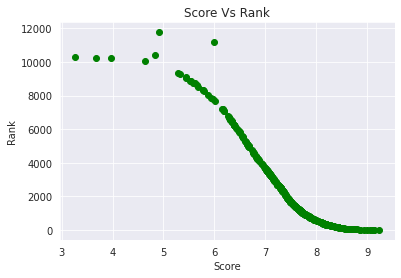

In [125]:
rank=df['rank']
score=df['score']
popularity=df['popularity']
favorites=df['favorites']

sns.set_style("darkgrid")

plt.figure(1)
plt.title("Score Vs Rank")
plt.xlabel("Score")
plt.ylabel("Rank")
plt.plot(score, rank, "og")

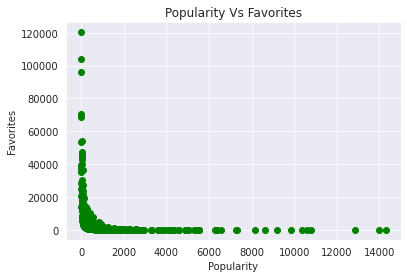

In [126]:
plt.figure(5)
plt.title("Popularity Vs Favorites")
plt.xlabel("Popularity")
plt.ylabel("Favorites")
plt.plot(popularity, favorites, "og")

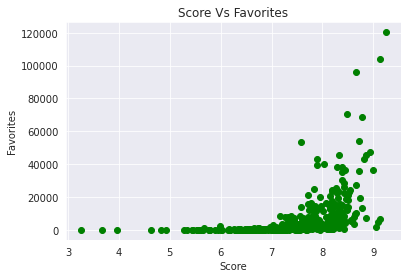

In [127]:
plt.figure(6)
plt.title("Score Vs Favorites")
plt.xlabel("Score")
plt.ylabel("Favorites")
plt.plot(score, favorites, "og")

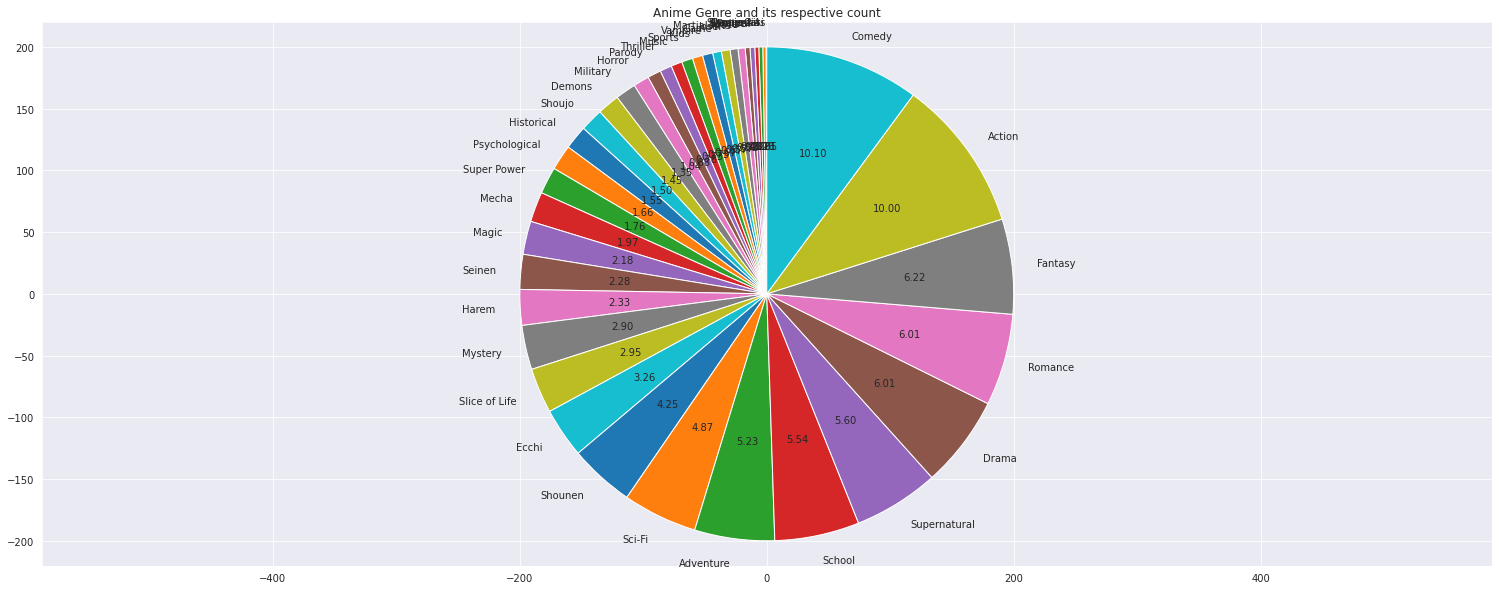

In [128]:
figureObject, axesObject = plt.subplots(figsize=(20, 10))

box = axesObject.get_position()
axesObject.set_position([box.x0, box.y0, box.width * 1.3, box.height])


axesObject.pie(pieValues,labels=pieLabels,autopct='%1.2f', startangle=90, radius=200, frame=True)

# Aspect ratio - equal means pie is a circle

axesObject.axis('equal')

plt.title("Anime Genre and its respective count")
plt.show()

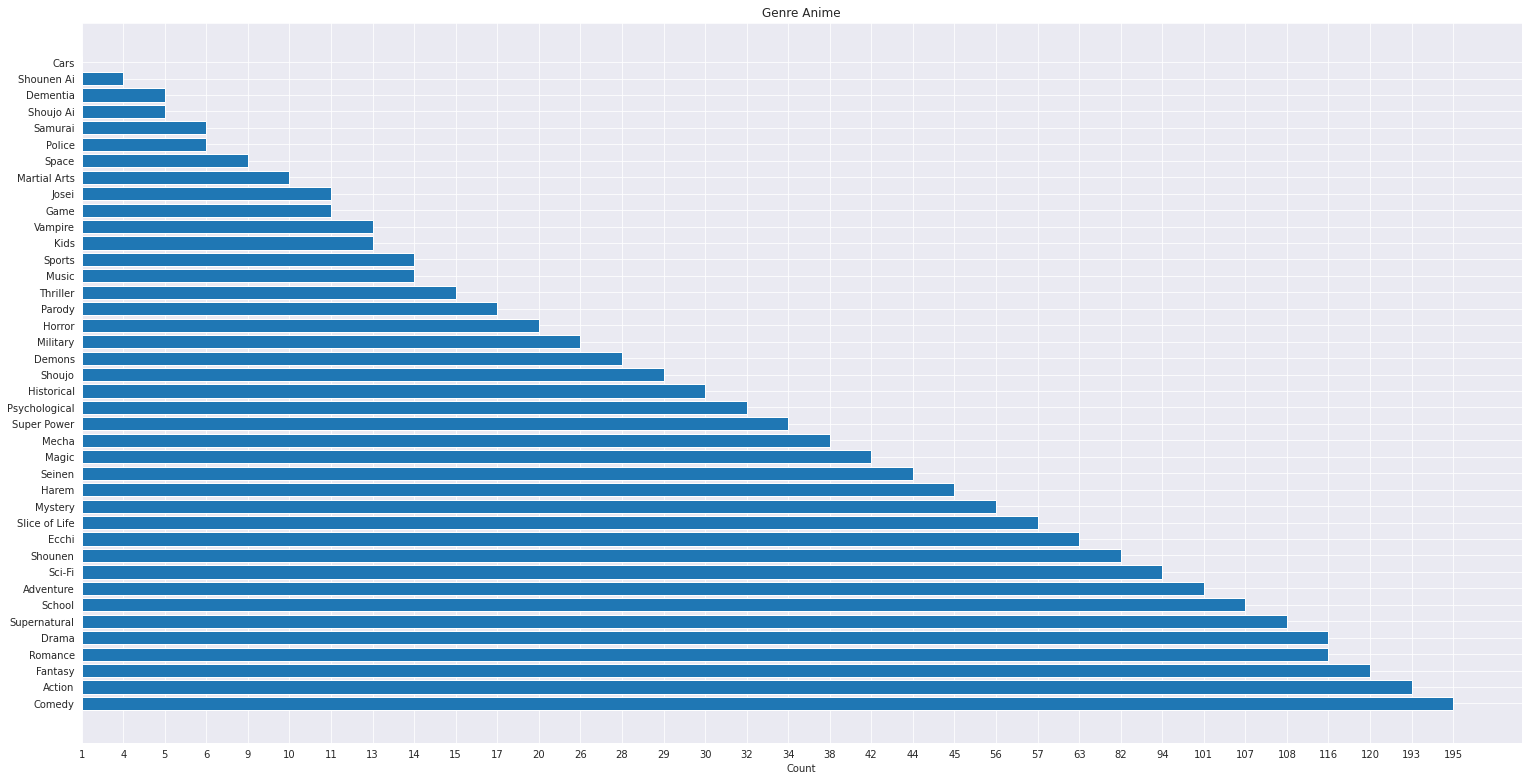

In [129]:
#histogram

figr = plt.figure(figsize=(20,10))
axs = figr.add_axes([0,0,1,1])

y_posn = np.arange(len(pieLabels))

axs.barh(y_posn, pieValues, align='center')
axs.set_yticks(y_posn)
axs.set_yticklabels(pieLabels)
axs.invert_yaxis()  # labels read top-to-bottom
axs.set_xlabel('Count')
axs.set_title('Genre Anime')

plt.show()

### Anime Recommendation system

In [130]:
newdf = df['genre'].apply(lambda x: eval(x)).str.join('|').str.get_dummies()
newdf

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
11,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14001,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14010,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14020,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14164,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
df.head(5)

,animeID,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,...,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],...,405664.0,26.0,39.0,795733.0,43460.0,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
2,6,Trigun,Trigun,トライガン,[],TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],...,212537.0,255.0,146.0,408548.0,10432.0,"Vash the Stampede is the man with a $$60,000,0...",The Japanese release by Victor Entertainment h...,Spring 1998,Thursdays at 01:15 (JST),"{'Adaptation': [{'mal_id': 703, 'type': 'manga..."
5,16,Hachimitsu to Clover,Honey and Clover,ハチミツとクローバー,"['HachiKuro', 'Honey & Clover']",TV,Manga,"['Genco', 'Fuji TV', 'Shueisha']","['Comedy', 'Drama', 'Josei', 'Romance', 'Slice...",['J.C.Staff'],...,57065.0,419.0,536.0,172274.0,3752.0,"Yuuta, Takumi, and Shinobu share a six-tatami ...",Hachimitsu to Clover was the first anime to ai...,Spring 2005,Fridays at 00:35 (JST),"{'Adaptation': [{'mal_id': 1009, 'type': 'mang..."
9,20,Naruto,Naruto,ナルト,['NARUTO'],TV,Manga,"['TV Tokyo', 'Aniplex', 'Shueisha']","['Action', 'Adventure', 'Comedy', 'Super Power...",['Studio Pierrot'],...,716412.0,705.0,10.0,1091313.0,39356.0,"Moments prior to Naruto Uzumaki's birth, a hug...",Naruto received numerous awards during its air...,Fall 2002,Thursdays at 19:30 (JST),"{'Adaptation': [{'mal_id': 11, 'type': 'manga'..."
11,22,Tennis no Ouji-sama,The Prince of Tennis,テニスの王子様,[],TV,Manga,"['Production I.G', 'Nihon Ad Systems']","['Action', 'Comedy', 'Sports', 'School', 'Shou...",['Trans Arts'],...,50306.0,577.0,856.0,113662.0,2885.0,The world of tennis is harsh and highly compet...,"Since 2003, there has been a bi-annual musical...",Fall 2001,Unknown,"{'Adaptation': [{'mal_id': 49, 'type': 'manga'..."


In [132]:
finaldf = pd.concat([newdf, df], axis=1)
finaldf

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
0,1,1,0,1,0,0,1,0,0,0,...,405664.0,26.0,39.0,795733.0,43460.0,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
2,1,1,0,1,0,0,1,0,0,0,...,212537.0,255.0,146.0,408548.0,10432.0,"Vash the Stampede is the man with a $$60,000,0...",The Japanese release by Victor Entertainment h...,Spring 1998,Thursdays at 01:15 (JST),"{'Adaptation': [{'mal_id': 703, 'type': 'manga..."
5,0,0,0,1,0,0,1,0,0,0,...,57065.0,419.0,536.0,172274.0,3752.0,"Yuuta, Takumi, and Shinobu share a six-tatami ...",Hachimitsu to Clover was the first anime to ai...,Spring 2005,Fridays at 00:35 (JST),"{'Adaptation': [{'mal_id': 1009, 'type': 'mang..."
9,1,1,0,1,0,0,0,0,0,0,...,716412.0,705.0,10.0,1091313.0,39356.0,"Moments prior to Naruto Uzumaki's birth, a hug...",Naruto received numerous awards during its air...,Fall 2002,Thursdays at 19:30 (JST),"{'Adaptation': [{'mal_id': 11, 'type': 'manga'..."
11,1,0,0,1,0,0,0,0,0,0,...,50306.0,577.0,856.0,113662.0,2885.0,The world of tennis is harsh and highly compet...,"Since 2003, there has been a bi-annual musical...",Fall 2001,Unknown,"{'Adaptation': [{'mal_id': 49, 'type': 'manga'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14001,0,0,0,0,0,0,0,1,0,0,...,2930.0,9278.0,3649.0,12265.0,66.0,The story is set in a prison in the near futur...,The anime aired in three versions: an all-ages...,Spring 2018,Mondays at 01:00 (JST),"{'Adaptation': [{'mal_id': 112745, 'type': 'ma..."
14010,0,0,0,1,0,0,1,0,0,0,...,4169.0,2988.0,2827.0,21015.0,38.0,Chuukan Kanriroku Tonegawa is a spin-off of th...,The anime was aired on Wednesdays at 1:59 a.m....,Summer 2018,Wednesdays at 00:00 (JST),"{'Adaptation': [{'mal_id': 90689, 'type': 'man..."
14020,1,1,0,0,0,0,0,0,1,0,...,138670.0,1106.0,259.0,306698.0,2470.0,"Goblins are known for their ferocity, cunning,...",Based on the light novel series written by Kum...,Fall 2018,Sundays at 00:30 (JST),"{'Adaptation': [{'mal_id': 95311, 'type': 'man..."
14164,1,1,0,0,0,0,0,0,1,0,...,1131.0,6674.0,3924.0,10526.0,17.0,"The sacred sword ""Excalibur"". A sword that was...",Hangyakusei Million Arthur depicts a lighter c...,Fall 2018,Thursdays at 22:00 (JST),"{'Other': [{'mal_id': 30954, 'type': 'anime', ..."


In [133]:
from sklearn.model_selection import train_test_split
from sklearn import svm

xfinaldf = finaldf.iloc[:100,]
X = xfinaldf[['Action','Adventure','Comedy','Drama', 'Fantasy', 'Magic', 'Military','Sci-Fi', 'Shounen', 'Super Power']]
Y = xfinaldf['title_english'].index.tolist()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

model = svm.SVC()
model.fit(X,Y)

print(model.score(X,Y))

0.67


In [134]:
from sklearn.model_selection import train_test_split
from sklearn import svm

xfinaldf = finaldf.iloc[100:200,]
X = xfinaldf[['Action','Adventure','Comedy','Drama', 'Fantasy', 'Magic', 'Military','Sci-Fi', 'Shounen', 'Super Power']]
Y = xfinaldf['title_english'].index.tolist()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

model = svm.SVC()
model.fit(X,Y)

print(model.score(X,Y))

0.5


In [135]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

xfinaldf = finaldf.iloc[200:300,]
X = xfinaldf[['Action','Adventure','Comedy','Drama', 'Fantasy', 'Magic', 'Military','Sci-Fi', 'Shounen', 'Super Power']]
Y = xfinaldf['title_english'].index.tolist()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

model = svm.SVC()
model.fit(X,Y)

print("Score: ", model.score(X,Y))

Score:  0.44


In [136]:
from sklearn.model_selection import train_test_split
from sklearn import svm

xfinaldf = finaldf.iloc[300:,]
X = xfinaldf[['Action','Adventure','Comedy','Drama', 'Fantasy', 'Magic', 'Military','Sci-Fi', 'Shounen', 'Super Power']]
Y = xfinaldf['title_english'].index.tolist()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

model = svm.SVC()
model.fit(X,Y)

print(model.score(X,Y))

0.4166666666666667
